## Rulan Pan (rp33973), Tianxin Huang(th29885)


# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 80</p>
## <p style="text-align: center;">Due: Tuesday, September 18 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so,  please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise. 


## Answer
2 hypothetical cases and 1 real-life cases regarding 3 different challenges:

Hypothetical case (a)-- solving the wrong problem. Suppose a model is built within a company, which predicts whether a new product with certain attributes would sell well. However, the model solves the wrong problem because the company cares more about the net profit than the sales volume. In some cases, launching a popular new product brings about cannibalism among exisiting products produced by the same company, which finally results in decreasing profit. Hypothetical case (b)-- solving the right problem too late for it to matter. A package for R is designed and it makes it easy for cars to implement automatic pilot. However, at the time when it is built, few people use R to develop AI. Instead, new languages are already created in this realm even though they could not solve the problem as smart as the package on R does. Therefore, nobody will care the package based on R.

Besides, a real-life challenge we have encountered is solving the right problem, but unfortunately in a wrong way. My team were using Python to analyze the Costa Rican Poverty data to identify the factors that matter most for household poverty. We cleaned the data and then built up several models like logistic regression, random foret and naive bayes where we put all of our variables in. However, as we thought we have figured out the problem, we found that lots of the variables in the original dataset were actually based on individuals' attributes instead of the household as a whole. Therefore, we had to redo the models by reselecting the variables that summarized the feautures of a household rather than an individual. Based on that experience, we learnt that so as to solve the right problem in the right way, we have to do enough data preparation work. Realizing that we have gone in a wrong way in the middle of or after finishing our work is a waste of time and energy.


# Question 2: Maximum likelihood estimate (10 pts)

Prove the statement on slide 3 of notes on MLR:
"Then minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model."


## Answer

Assume $Y=f_\theta(X)+\epsilon$ and $\epsilon\sim N(0,\theta^2)$

Also $y_i=f_\theta(x_i)+\epsilon_i $ and $\epsilon_i\sim N(0,\theta^2)$

Then $y_i\sim N(f_\theta(x_i),\theta^2)$

$f(y_i|x_i;\sigma^2)=(2\pi\sigma^2)^{-\frac{1}{2}}exp(-\frac{1}{2\sigma^2}(y_i-f_\theta(x_i))^2)$ 

Likelihood: $L(\theta)=ln P(Y|X,\theta)=\sum_{i=1}^nlnP(y_i|x_i;\theta)=\sum_{i=1}^nlnf(y_i|x_i;\theta)= -\frac{n}{2}ln(2\pi\sigma^2)-\frac{1}{2\sigma^2}(y_i-f_\theta(x_i))^2$(1)

To maximize (1), we need to choose $\theta$ to minimize$ (y_i-f_\theta(x_i))^2$

MSE : $~~$$MSE=\frac{1}{n}[y_i-x_i\beta]=\frac{1}{n}(y_i-f_\theta(x_i))^2$ (2)

In OLS we choose $\theta$ to minimize (2)

So the  θ  from (1)(2) is of the same value, which proves that minimizing Mean Squared Error (MSE) on the training data (which you can do using OLS) yields the Maximum Likelihood Estimate (MLE) solution of the assumed generative model.

# Question 3: Collinearity Issues (5 pts)

What is the “collinearity” issue encountered in MLR? Why is this a problem when you try to use MLR?
Suggest one way of addressing this problem.


## Answer
In MLR, two variables (e.g., x1 and x2) are said to be collinear if they are approximately or exactly linearly dependent. Correlated variables mean that the change in one variable will be associated with the change in another.
It is a problem because collinearity can affect our interpretation of a multiple regression.
Also they inflate the standard errors for the regression coefficients so we are less certain about them. The problem will also cause the precision of the estimate coefficients to reduce. Based on different independent variables used in the model, the coefficient estimates may significantly differ, which means that the coefficients will be very sensitive to even small changes of variables in the model.

We can use three ways to address this problem.
1. Select a subset of all independent variables using stepwise regression: add one variable at the time until no remaining variables makes a significant contribution. During each step, also try to delete variables if no harms is caused.

2. Use all independent variables but damp them with Ridge or Lasso Regression, which is to say give penalty to new variables. Some variables are removed due to too much penalty.

3. Summarize the information in the predictors into a smaller set of variables using principal component analysis and partial least squares.

# Question 4: Multiple Linear Regression in Python (20 pts)

Use the following code to import the allstate-claims-severity dataset and linear models in python. The dataset is taken from https://www.kaggle.com/c/allstate-claims-severity I have removed the categorical variables to make it easier to run the models. Because of this, MAE (Mean absolute error) will be on higher end compared to other Kaggle entries. Please donwload the dataset "reduced_train.csv" and use it.



In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

train_df = pd.read_csv("reduced_train.csv")

X = train_df.drop(['id','loss'],axis=1)
Y = train_df['loss']

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. The code for this is given below. Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MAE values thus obtained.

d.  (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE. Explain the results.

## Answer



In [2]:
# a
print ('number of rows ',len(X))
print ('number of columns ',len(X.columns))
X[:5]

number of rows  188318
number of columns  14


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [3]:
# b
reg = linear_model.LinearRegression()
reg.fit (X, Y)
print ('coefficient: ',reg.coef_)

# Make predictions
Y_pred = reg.predict(X)

# Mean absolute error
sum(abs(Y-Y_pred))/len(Y)

coefficient:  [-2137.11121171  1762.2406163    -56.57968487  -301.1729806
    30.03201819  -557.22509919  1707.95520608   298.61240614
  2049.37910438  -250.01986129 -1732.34887444  2724.38985824
  -631.30128902   273.62600504]


/Users/tammy/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


1950.3606265639944

In [4]:
# c 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=50)

reg = linear_model.LinearRegression()
reg.fit (X_train, Y_train)

# Make predictions
Y_tr_pred = reg.predict(X_train)
# Mean absolute error
maetr = sum(abs(Y_train-Y_tr_pred))/len(Y_train)

# Make predictions
Y_te_pred = reg.predict(X_test)
# Mean absolute error
maete = sum(abs(Y_test-Y_te_pred))/len(Y_test)

print('train MAE :\n', maetr,'\n'
      'test  MAE :\n', maete)

train MAE :
 1946.9866773014671 
test  MAE :
 1954.11105959615


Model fits on training data very well but model does not fit test data very well

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Frequency')

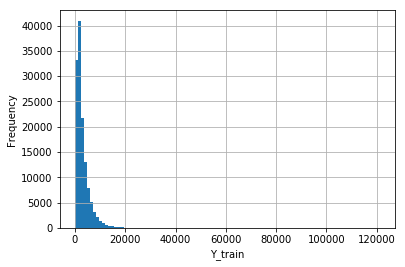

In [5]:
# d
# Plot the histogram of Y_train and see its distribution. 
%pylab inline
Y_train.hist(bins=100)
xlabel('Y_train')
ylabel('Frequency')

Text(0,0.5,'Frequency')

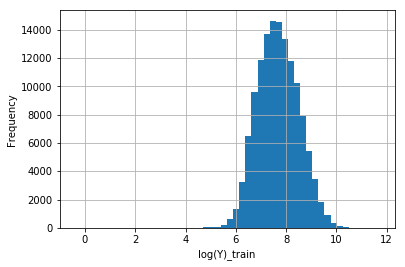

In [6]:
# Now take log of Y_train and plot its histogram. 
log(Y_train).hist(bins=50)
xlabel('log(Y)_train')
ylabel('Frequency')

In [14]:
# Now run regression again after taking log and compare the MAE. 
# do np.exp(predictions) to bring them back to original scale, 
# then calculate MAE. Explain the results.
from sklearn.metrics import mean_absolute_error

reg_l = linear_model.LinearRegression()
reg_l.fit (X_train, log(Y_train))

# Make predictions
Y_tr_pred = np.exp(reg_l.predict(X_train))

# Mean absolute error
maetr = sum(abs(Y_train-Y_tr_pred))/len(Y_train)

print('train MAE :\n', maetr,'\n')

train MAE :
 1797.4369165421042 



In [24]:
print ('Explanation: MAE decreases after taking log of y. It is becasue the scale of y becomes smaller than before so that a change in X will relatively affect less on y after it is taken log. ')

Explanation: MAE decreases after taking log of y. It is becasue the scale of y becomes smaller than before so that a change in X will relatively affect less on y after it is taken log. 


# Question 5: Ridge and Lasso Regression (25 points)


Using the same data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Split the data into a training set and a test set, using the train_test_split with test_size = 0.30 and random_state = 50. Take log of the Y_train and use it for training.

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-6}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-6,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

## Answer



In [8]:
# a
#lasso
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

alphas =  10**np.linspace(10,-6,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

lasso = Lasso(random_state=0)
clf_lasso = GridSearchCV(lasso, tuned_parameters, scoring='neg_mean_absolute_error', cv=n_folds, refit=False)
clf_lasso.fit(X_train, log(Y_train))
clf_lasso.best_params_

/Users/tammy/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tammy/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tammy/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/tammy/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_desc

{'alpha': 6.309284415330092e-05}

In [9]:
# a
# Ridge

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

ridge = Ridge(random_state=0)
clf_ridge = GridSearchCV(ridge, tuned_parameters, scoring='neg_mean_absolute_error',cv=n_folds, refit=False)
clf_ridge.fit(X_train, log(Y_train))
clf_ridge.best_params_

{'alpha': 13.5929412136647}

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

/Users/tammy/anaconda2/envs/Python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<Figure size 720x432 with 0 Axes>

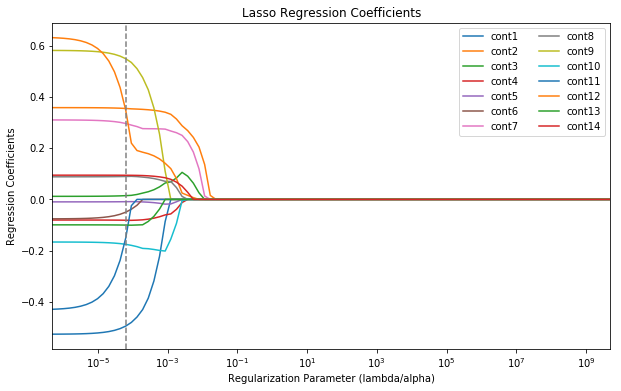

In [10]:
# lasso

# Initialize lasso model 
lasso =Lasso()
# Initialize dataframe to store lasso coefficients
df_coefs = pd.DataFrame(np.nan, index = alphas, columns = X.columns.values)
lasso_coefs = df_coefs
# Fill dataframe with regression coefficients for each value of alpha
for alpha in alphas:
    lasso.alpha = alpha
    lasso.fit(X_train, log(Y_train))
    lasso_coefs.loc[alpha] = lasso.coef_

# Plot coefficients
plt.figure(figsize(10,6))
lasso_coefs.plot(logx=True)
legend(loc=1, ncol=2)
xlim([alphas[-1], alphas[0]])
title('Lasso Regression Coefficients')
xlabel('Regularization Parameter (lambda/alpha)')
ylabel('Regression Coefficients')
## Indicate best regularization parameter
plt.axvline(6.309284415330092e-05, linestyle='--', color='.5')
plt.show()

<Figure size 720x432 with 0 Axes>

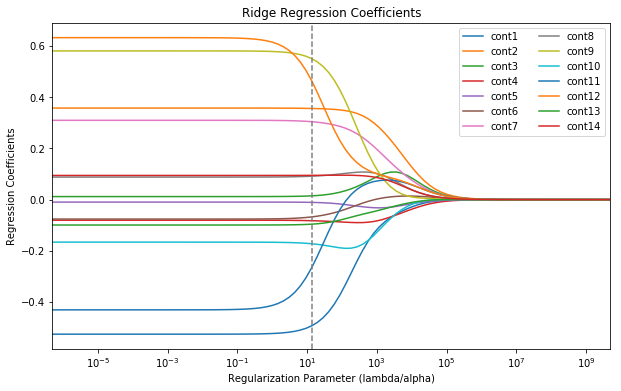

In [11]:
# Ridge

# Initialize ridge model 
ridge = Ridge()
# Initialize dataframe to store ridge coefficients
df_coefs = pd.DataFrame(np.nan, index = alphas, columns = X.columns.values)
ridge_coefs = df_coefs
# Fill dataframe with regression coefficients for each value of alpha
for alpha in alphas:
    ridge.alpha = alpha
    ridge.fit(X_train, log(Y_train))
    ridge_coefs.loc[alpha] = ridge.coef_

# Plot coefficients
plt.figure(figsize(10,6))
ridge_coefs.plot(logx=True)
legend(loc=1, ncol=2)
xlim([alphas[-1], alphas[0]])
title('Ridge Regression Coefficients')
xlabel('Regularization Parameter (lambda/alpha)')
ylabel('Regression Coefficients')
## Indicate best regularization parameter
plt.axvline(13.5929412136647, linestyle='--', color='.5')
plt.show()

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

In [12]:
# 3
# Least Squares
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X_train, log(Y_train))
linear_pred = np.exp(linear.predict(X_test))
linear_MAE = mean_absolute_error(linear_pred,Y_test)

# Lasso
lasso = linear_model.Lasso(alpha = 6.309284415330092e-05)
lasso.fit(X_train, log(Y_train))
lasso_pred = np.exp(lasso.predict(X_test))
lasso_MAE = mean_absolute_error(lasso_pred,Y_test)

# Ridge
ridge = linear_model.Ridge(alpha = 13.5929412136647)
ridge.fit(X_train, log(Y_train))
ridge_pred = np.exp(ridge.predict(X_test))
ridge_MAE = mean_absolute_error(lasso_pred,Y_test)

print ('Out of Sample MAE:')
print
print ('Linear Regression :', linear_MAE)
print ('Lasso Regression  :', lasso_MAE)
print ('Ridge Regression  :', ridge_MAE)

Out of Sample MAE:
Linear Regression : 1810.6519682594767
Lasso Regression  : 1810.6424216634994
Ridge Regression  : 1810.6424216634994


4) Run lasso again with cross validation using sklearn.linear_model.LassoCV. Set the cross validation parameters as follows:

LassoCV(alphas=None, cv=10, max_iter=10000)
Report the best  λ  based on cross validation. Run lasso on the training data using the best  λ  and report the coefficeints for all variables. (5pts)

In [13]:
import sklearn
reg_lasso = sklearn.linear_model.LassoCV(alphas=None, cv=10, max_iter=10000)
reg_lasso.fit(X_train, log(Y_train))
alpha_best=reg_lasso.alpha_
print("The best lambda: ",alpha_best,'\n')

reg_lasso = sklearn.linear_model.Lasso(alpha=alpha_best, max_iter=10000)
reg_lasso.fit(X_train,log(Y_train))
print('Coefficients for 14 features:')
reg_lasso.coef_

The best lambda:  1.742378003185893e-05 

Coefficients for 14 features:


array([-0.51711206,  0.35693216,  0.01261526, -0.08068485, -0.00950437,
       -0.06881325,  0.30609698,  0.08840324,  0.57216477, -0.16869083,
       -0.35348216,  0.55420528, -0.09951851,  0.09436384])

# Question 6 (10pts)

Please solve problem \#3.3 on page 174 in Bishop (Chapter 3). The problem has been uploaded to Canvas under 'Files': **CH3 problems from Bishop PRML.pdf**.

## Answer
### 1）
Let $r=\left[\begin{smallmatrix}\sqrt{r_1} & & & \\ & \sqrt{r_2} & & \\ &  & \ddots & \\ &  & & \sqrt{r_n}\\\end{smallmatrix}\right]$ and $R=\left[\begin{smallmatrix}r_1 & & & \\ & r_2 & & \\ &  & \ddots & \\ &  & & r_n\\\end{smallmatrix}\right]$ , then the weighted sum-of-squares error into matrix representation: $E_D(\textbf{w})=[r(\textbf{t}-\Phi(x)\textbf{w})]^T[r(\textbf{t}-\Phi(x)\textbf{w})]=[(r\textbf{t}-r\Phi(x)\textbf{w})]^T[(r\textbf{t}-r\Phi(x)\textbf{w})]$   

Hence, the solution $w^*=[(r\Phi(x))^Tr\Phi(x)]^{-1}(r\Phi(x))^Trt=[\Phi(x)^Tr^Tr\Phi(x)]^{-1}\phi(x)^Tr^Trt=[\Phi(x)^TR\Phi(x)]^{-1}\Phi(x)^TRt$

### 2）
In cases where heteroscedasticity exists, OLS could not give precise estimate of the coefficient since the maximum likelihood methods is based on the assumption that the variance of noise does not change from one sample point to another. If $r_n=\frac{1}{\sigma_n^2}$ is applied, then we can adjust them into homoscedasticity. Thus, the coefficient given by minimizing the adjusted square errors keeps precise.

In cases where there are duplicated data points, useful information from one unique point is diluted to an extend of the number of the duplicated points. Then adjust the duplicated points by weighting them $r_n=\frac{1}{k_n}$ ($k_n$ is the number of the same points) and the coefficient given by minimizing the adjusted square errors keeps precise.
